## yfactor_necstdb.py 用可視化ツールの template です。
- 概要：
  - 全 cell を実行すると、12 素子 の IV カーブ plot が表示されます
    - 100 GHz 帯 ( SSB ) 素子 : 8 個
    - 200 GHz 帯 ( 2SB ) 素子 : 4 個

### モジュールを import します。

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import xarray as xr
from scipy.interpolate import interp1d
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 12

import matplotlib.pyplot as plt

import necstdb

In [2]:
cwd = os.getcwd()
db = necstdb.opendb(cwd)

In [3]:
def conv_xarray(db, topic, name=''):
    array_data = db.open_table(topic).read(astype="array")
    xarray_data = xr.DataArray(array_data['data'], dims=['timestamp'], coords={'timestamp' : array_data['timestamp']}, name=name)
    return xarray_data

In [4]:
def resample_pre(resample_xarray, reference_xarray, index="timestamp", kind="previous", **kwargs):
    resample_func = interp1d(resample_xarray[index].values, resample_xarray.values, kind, **kwargs)
    return resample_func(reference_xarray[index].values)

In [5]:
power = conv_xarray(db, 'ml2437a')[2:-2]

In [6]:
slider = conv_xarray(db, 'slider_location_cmd')
vol = conv_xarray(db, 'sis_vol_2l')
vol_cmd = conv_xarray(db, 'sis_vol_2l_cmd')
loatt = conv_xarray(db, 'loatt_2l_cmd')
cur = conv_xarray(db, 'sis_cur_2l')

In [7]:
data = xr.DataArray(power.values, coords={'timestamp' : power['timestamp'].values, 'sisvol' : ('timestamp', resample_pre(vol, power, kind='linear')), 'sisvol_cmd' : ('timestamp', resample_pre(vol_cmd, power, fill_value="extrapolate")), 'slider' : ('timestamp', resample_pre(slider, power, fill_value="extrapolate")),  'siscur' : ('timestamp', resample_pre(cur, power, kind = 'linear'))}, dims='timestamp')

In [8]:
pd_data = data.to_dataframe("power")

In [9]:
pd_mean = pd_data.groupby(['sisvol_cmd', 'slider']).median()

In [10]:
pd_mean

sisvol      siscur    power
sisvol_cmd slider                                 
0.05       8000.0   -0.073242   -7.412624 -14.1710
           20000.0  -0.024414   -7.324219 -14.1900
0.10       8000.0    0.024414   -7.324219 -14.1150
           20000.0   0.024414   -7.324219 -14.1720
0.15       8000.0    0.073242   -6.680140 -14.1090
...                       ...         ...      ...
14.90      20000.0  14.811966  471.191406 -26.0385
14.95      8000.0   14.849311  473.632812 -26.0150
           20000.0  14.846133  473.632812 -26.0190
15.00      8000.0   14.892578  473.632812 -26.0255
           20000.0  14.894541  473.632812 -25.9705

[600 rows x 3 columns]

In [11]:
pd_mean['power_diff'] = pd_mean.groupby(['sisvol_cmd'])['power'].diff()

In [12]:
pd_mean

sisvol      siscur    power  power_diff
sisvol_cmd slider                                             
0.05       8000.0   -0.073242   -7.412624 -14.1710         NaN
           20000.0  -0.024414   -7.324219 -14.1900      -0.019
0.10       8000.0    0.024414   -7.324219 -14.1150         NaN
           20000.0   0.024414   -7.324219 -14.1720      -0.057
0.15       8000.0    0.073242   -6.680140 -14.1090         NaN
...                       ...         ...      ...         ...
14.90      20000.0  14.811966  471.191406 -26.0385      -0.004
14.95      8000.0   14.849311  473.632812 -26.0150         NaN
           20000.0  14.846133  473.632812 -26.0190      -0.004
15.00      8000.0   14.892578  473.632812 -26.0255         NaN
           20000.0  14.894541  473.632812 -25.9705       0.055

[600 rows x 4 columns]

In [13]:
pd_power = pd_mean[pd_mean['power_diff'].notna()].reset_index()

In [14]:
pd_power['yfactor']=10**(pd_power['power_diff']/10)

In [15]:
temp = conv_xarray(db, 'lakeshore_ch1')

In [18]:
temp

<xarray.DataArray '' (timestamp: 968)>
array([505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
...
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.,
       505., 505., 505., 505., 505., 505., 505., 505., 505., 505., 505.])
Coordinates:
  * timestamp  (timestamp) float64 1.625e+09 1.625e+09 ... 1.625e+09 1.625e+09

In [19]:
pd_power['Trx'] =  (temp.mean().values-77*pd_power['yfactor'])/(pd_power['yfactor']-1)

In [20]:
pd_power.sort_values("Trx")

,sisvol_cmd,slider,sisvol,siscur,power,power_diff,yfactor,Trx
267,13.40,20000.0,13.305664,427.246094,-26.2810,-5.000000e-04,0.999885,-3.717852e+06
257,12.90,20000.0,12.799655,410.156250,-26.2810,-5.000000e-04,0.999885,-3.717852e+06
256,12.85,20000.0,12.757273,410.156250,-26.2795,-5.000000e-04,0.999885,-3.717852e+06
268,13.45,20000.0,13.354492,428.190569,-26.2830,-1.000000e-03,0.999770,-1.859071e+06
265,13.30,20000.0,13.208008,422.740228,-26.2820,-1.000000e-03,0.999770,-1.859071e+06
...,...,...,...,...,...,...,...,...
132,6.65,20000.0,6.567383,219.726562,-26.8190,3.552714e-15,1.000000,4.818852e+17
121,6.10,20000.0,6.005859,197.753906,-26.7680,0.000000e+00,1.000000,inf
286,14.35,20000.0,14.257812,454.101562,-26.2270,0.000000e+00,1.000000,inf
258,12.95,20000.0,12.866211,412.597656,-26.2790,0.000000e+00,1.000000,inf


In [22]:
cold = pd_mean.groupby('slider').get_group(20000).reset_index()
hot = pd_mean.groupby('slider').get_group(8000).reset_index()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


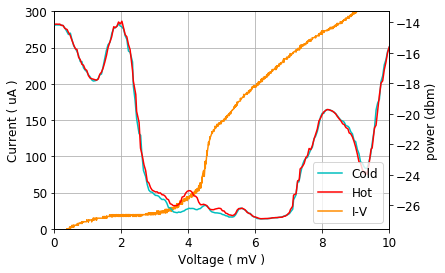

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pd_data.sort_values('sisvol')['sisvol'], pd_data.sort_values('sisvol')['siscur'], color='darkorange', label='I-V')
ax.set_xlim(0,10)
ax.set_ylim(0,300)
ax1 = ax.twinx()
ax1.plot(cold['sisvol'], cold['power'], color='c', label='Cold')
ax1.plot(hot['sisvol'], hot['power'], color='red', label='Hot')
#ax1.set_ylim(-30, -22)
#ax.set_xlim(0,10)
ax.set_xlabel('Voltage ( mV )')
ax.set_ylabel('Current ( uA )')
ax1.set_ylabel('power (dbm)')
ax.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')
plt.savefig('yfactor_power.pdf')

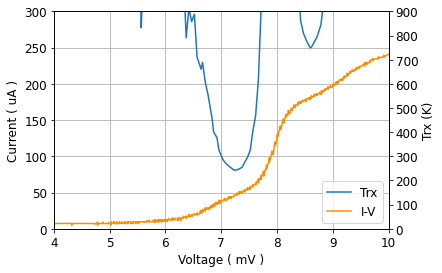

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pd_data.sort_values('sisvol')['sisvol'], pd_data.sort_values('sisvol')['siscur'], color='darkorange', label='I-V')
ax.set_xlim(4,10)
ax.set_ylim(0,300)
ax1 = ax.twinx()
ax1.plot(pd_power['sisvol'], pd_power['Trx'], label='Trx')
ax1.set_ylim(0, 900)
#ax.set_xlim(0,10)
ax.set_xlabel('Voltage ( mV )')
ax.set_ylabel('Current ( uA )')
ax1.set_ylabel('Trx (K)')
ax.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')
plt.savefig('yfactor_power.pdf')

In [35]:
pd.set_option('display.max_rows', 100)